## Imports

In [506]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

## Definindo DataSet

In [507]:
X, y = make_moons(n_samples=500)
X.shape, y.shape, np.unique(y, return_counts=True)

((500, 2), (500,), (array([0, 1]), array([250, 250])))

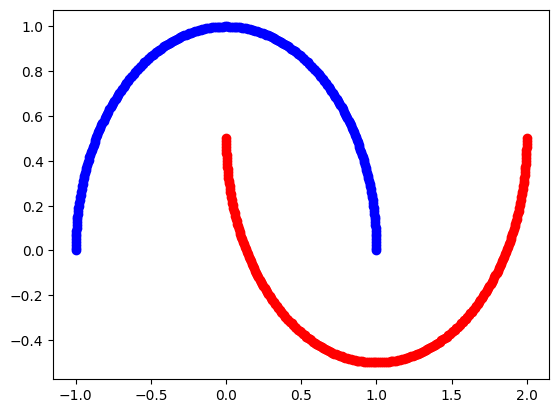

In [508]:
plt.scatter(X[:,0][y==0], X[:,1][y==0], color='blue')
plt.scatter(X[:,0][y==1], X[:,1][y==1], color='red')

# Multilayer perceptron

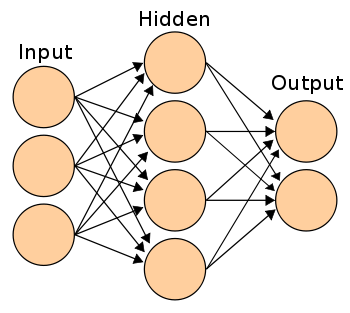

In [509]:
class MLP():
    def __init__(self, hidden_neurons:int, output_neurons:int, learning_rate:float, max_iter:int) -> None:
        self.hidden_neurons = hidden_neurons
        self.output_neurons = output_neurons
        self.learning_rate = learning_rate
        self.max_iter = max_iter # epochs

    def predict(self, X) -> np.ndarray:
        """Faz a previsão de valores para os dados de teste."""
        return self.__feedfoward(X)

    def fit(self, X:np.ndarray, y:np.ndarray, show_accuracy=False) -> None:
        self.__init_params(X, y)
        """Realiza o treinamento da rede."""
        for e in range(self.max_iter):
            output = self.__feedfoward(self.__X)
            loss = self.__loss_function(output)

            # Condição de parada
            accuracy = self.__calc_accuracy(output)
            if accuracy == 1:
                print(f'100% de acurácia após {e} épocas. Treinamento concluído.')
                break
            elif show_accuracy:
                print(f'Época: {e} \t Acertos: {accuracy:.3f} \t Perda: {loss:.3f}')

            self.__backpropagation(output)

    def __init_params(self, X:np.ndarray, y:np.ndarray) -> None:
        self.__X = X
        self.__y = y
        self.__input_neurons = self.__X.shape[1]

        # camada inicial para camada oculta
        self.__f1 = None # função de ativação
        self.__w1 = np.random.randn(self.__input_neurons, self.hidden_neurons) # matriz de pesos
        self.__b1 = np.zeros((1, self.hidden_neurons)) # bias

        # camada oculta para saida
        self.__w2 = np.random.randn(self.hidden_neurons, self.output_neurons)
        self.__b2 = np.zeros((1, self.output_neurons))

    def __feedfoward(self, X:np.ndarray) -> np.ndarray:
        """Realiza a propagação direta pela rede neural."""
        z1 = (X @ self.__w1) + self.__b1 # broadcasting
        self.__f1 = self.__activation_function(z1, layer='hidden')
        
        z2 = (self.__f1 @ self.__w2) + self.__b2
        f2 = self.__activation_function(z2, layer='output')

        return f2

    def __activation_function(self,input:np.ndarray, layer:str) -> np.ndarray:
        """Aplica a função de ativação à saída da camada especificada.:
            Valores possíveis:
                - 'hidden': Camada oculta, usa a função tangente hiperbólica.
                - 'output': Camada de saída, usa a função softmax.
        """
        if layer == 'hidden':
            return np.tanh(input)
        elif layer == 'output':
            exp_values = np.exp(input)
            return exp_values / np.sum(exp_values, axis=1, keepdims=True)
        else:
            raise ValueError("O argumento 'layer' deve ser 'hidden' ou 'output'.")
    
    def __loss_function(self, predictions: np.ndarray) -> float:
        """Calcula a perda da rede neural usando a Cross-Entropy Categórica."""
        # Probabilidades preditas para as classes verdadeiras
        predicted_probabilities = predictions[np.arange(len(predictions)), self.__y]
        loss = -np.log(predicted_probabilities).mean()
        return loss

    def __backpropagation(self, predictions:np.ndarray) -> None:
        """Executa o algoritmo de backpropagation para atualizar os pesos."""
        # Calcula o gradiente da perda em relação à saída
        grad_loss_output = np.copy(predictions)
        true_labels = np.eye(grad_loss_output.shape[1])[self.__y]  # one-hot encoding dos rótulos verdadeiros
        grad_loss_output -= true_labels
        
        # Gradientes da camada de saída
        grad_w2 = self.__f1.T @ grad_loss_output
        grad_b2 = np.sum(grad_loss_output, axis=0, keepdims=True)

        # Calcula o gradiente da perda em relação à entrada da camada oculta
        grad_loss_hidden = (grad_loss_output @ self.__w2.T) * (1 - np.power(self.__f1, 2))
        
        # Gradientes da camada oculta
        grad_w1 = self.__X.T @ grad_loss_hidden
        grad_b1 = np.sum(grad_loss_hidden, axis=0, keepdims=True)

        # Atualiza os pesos e bias das respectivas camadas
        self.__w2 += - self.learning_rate * grad_w2
        self.__b2 += - self.learning_rate * grad_b2
        self.__w1 += - self.learning_rate * grad_w1
        self.__b1 += - self.learning_rate * grad_b1

    def __calc_accuracy(self, predictions:np.ndarray) -> float:
        """Calcula a porcentagem de acertos do modelo."""
        predicted_labels = np.argmax(predictions, axis=1)
        true_labels = (predicted_labels == self.__y).sum()
        accuracy = true_labels / self.__X.shape[0]
        return accuracy

### Parâmetros de entrada

In [510]:
hidden_neurons = 15
output_neurons = 2
learning_rate = 0.001
max_iter = 200

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Testes

In [511]:
model = MLP(hidden_neurons, output_neurons, learning_rate, max_iter)
model.fit(X_train, y_train, show_accuracy=True)
ypred = model.predict(X_test)

predicted_labels = np.argmax(ypred, axis=1)
score = accuracy_score(y_test, predicted_labels)
score

Época: 0 	 Acertos: 0.125 	 Perda: 1.700
Época: 1 	 Acertos: 0.690 	 Perda: 0.666
Época: 2 	 Acertos: 0.772 	 Perda: 0.432
Época: 3 	 Acertos: 0.818 	 Perda: 0.371
Época: 4 	 Acertos: 0.838 	 Perda: 0.340
Época: 5 	 Acertos: 0.853 	 Perda: 0.319
Época: 6 	 Acertos: 0.860 	 Perda: 0.303
Época: 7 	 Acertos: 0.870 	 Perda: 0.290
Época: 8 	 Acertos: 0.875 	 Perda: 0.279
Época: 9 	 Acertos: 0.880 	 Perda: 0.270
Época: 10 	 Acertos: 0.885 	 Perda: 0.262
Época: 11 	 Acertos: 0.887 	 Perda: 0.255
Época: 12 	 Acertos: 0.892 	 Perda: 0.248
Época: 13 	 Acertos: 0.895 	 Perda: 0.243
Época: 14 	 Acertos: 0.895 	 Perda: 0.237
Época: 15 	 Acertos: 0.900 	 Perda: 0.233
Época: 16 	 Acertos: 0.902 	 Perda: 0.228
Época: 17 	 Acertos: 0.905 	 Perda: 0.224
Época: 18 	 Acertos: 0.905 	 Perda: 0.220
Época: 19 	 Acertos: 0.907 	 Perda: 0.217
Época: 20 	 Acertos: 0.910 	 Perda: 0.213
Época: 21 	 Acertos: 0.910 	 Perda: 0.210
Época: 22 	 Acertos: 0.912 	 Perda: 0.207
Época: 23 	 Acertos: 0.915 	 Perda: 0.204
Ép

0.97

## Comparativo com Scikit-learn

In [512]:
model = MLPClassifier(hidden_layer_sizes=(hidden_neurons,), activation='tanh', solver='sgd', learning_rate_init=learning_rate, max_iter=max_iter)
model.fit(X_train, y_train)
ypred = model.predict(X_test)

# Calculando a precisão
accuracy = accuracy_score(y_test, ypred)
accuracy

/home/lucas/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.76